In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gtd_df = pd.read_csv('globalterrorismdb_0718dist.tar.bz2', compression='bz2')
gtd_df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6220\1478916343.py:1: DtypeWarning: Columns (5,7,32,34,62,63,64,77,80,91,93,95,97,115,116,122) have mixed types. Specify dtype option on import or set low_memory=False.
  gtd_df = pd.read_csv('globalterrorismdb_0718dist.tar.bz2', compression='bz2')


,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 136 entries, Unnamed: 0 to related
dtypes: float64(55), int64(23), object(58)
memory usage: 188.5+ MB


In [7]:
# dropping the null values (data cleaning)
gtd_df.dropna(subset=['latitude', 'longitude', 'nkill', 'nwound'], inplace = True)

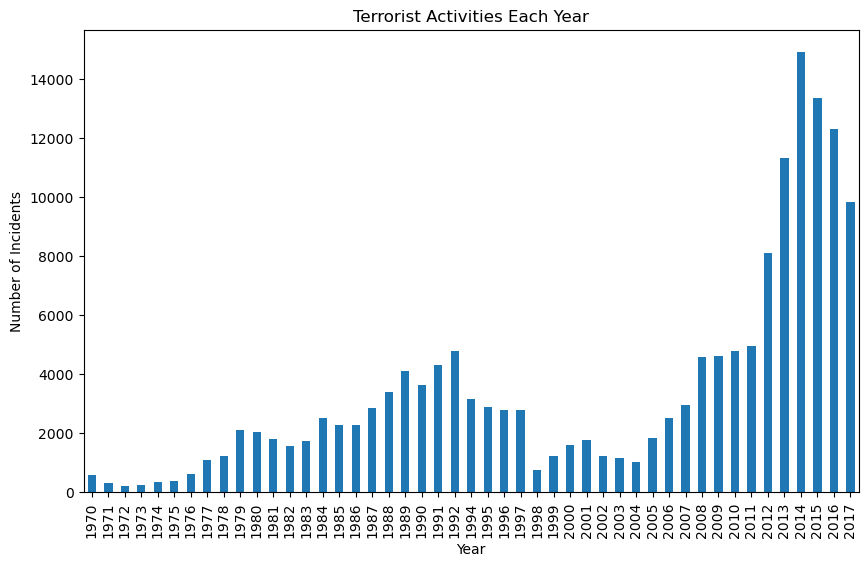

In [9]:
# Number of terrorist actvities over the years
plt.figure(figsize=(10, 6))
gtd_df['iyear'].value_counts().sort_index().plot(kind='bar')
plt.title('Terrorist Activities Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

This shows that the number of terror incidents have **increased** over time, with **2014** hitting the peak.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


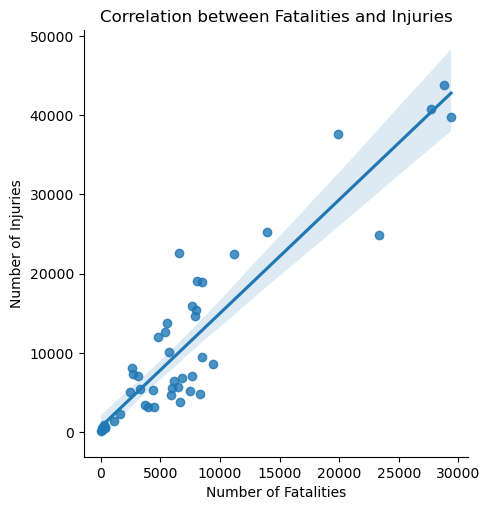

In [15]:
# Correlation between the number of incidents and casualties
casualties = gtd_df.groupby('iyear').agg({'nkill':'sum', 'nwound':'sum'}).reset_index()
casualties['total_casualties'] = casualties['nkill'] + casualties['nwound']
sns.lmplot(x='nkill', y='nwound', data=casualties)
plt.title('Correlation between Fatalities and Injuries')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Injuries')
plt.show()

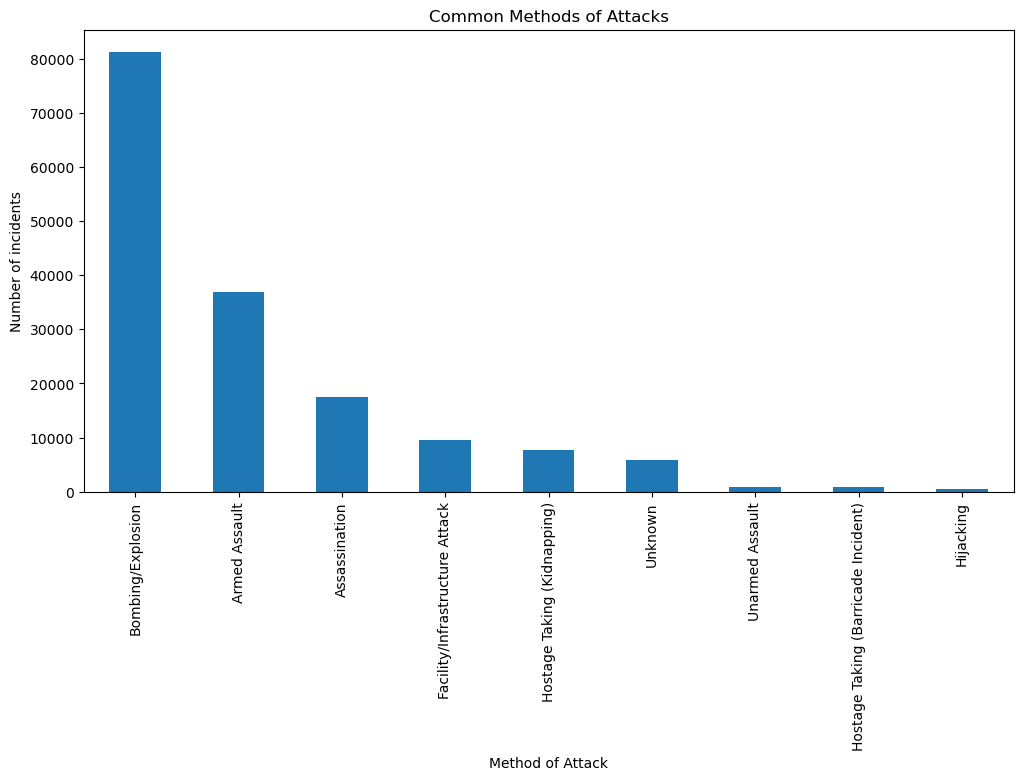

In [16]:
# Common method of attacks
plt.figure(figsize=(12, 6))
gtd_df['attacktype1_txt'].value_counts().plot(kind="bar")
plt.title('Common Methods of Attacks')
plt.xlabel('Method of Attack')
plt.ylabel('Number of incidents')
plt.show()

This shows that the most common attack method is **Bombing/Explosion**

In [17]:
# Mapping the attacks
import folium
from folium.plugins import HeatMap

In [19]:
map = folium.Map(location = [0,0], zoom_start=2)
gtd_heatmap = [[row['latitude'], row['longitude']] for index, row in gtd_df.iterrows()]
HeatMap(gtd_heatmap).add_to(map)

map.save('global_terrorism_heatmap.html')

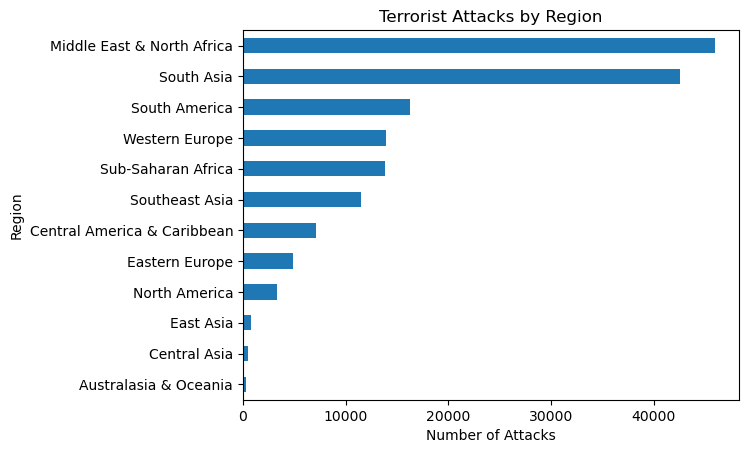

In [25]:
# Regional Analysis
region_analysis = gtd_df['region_txt'].value_counts().sort_values(ascending=True)
region_analysis.plot(kind='barh')
plt.title('Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()


This shows that **Middle East & North Africa** has experienced the most number of terrorist attacks over time

ValueError: incomplete format

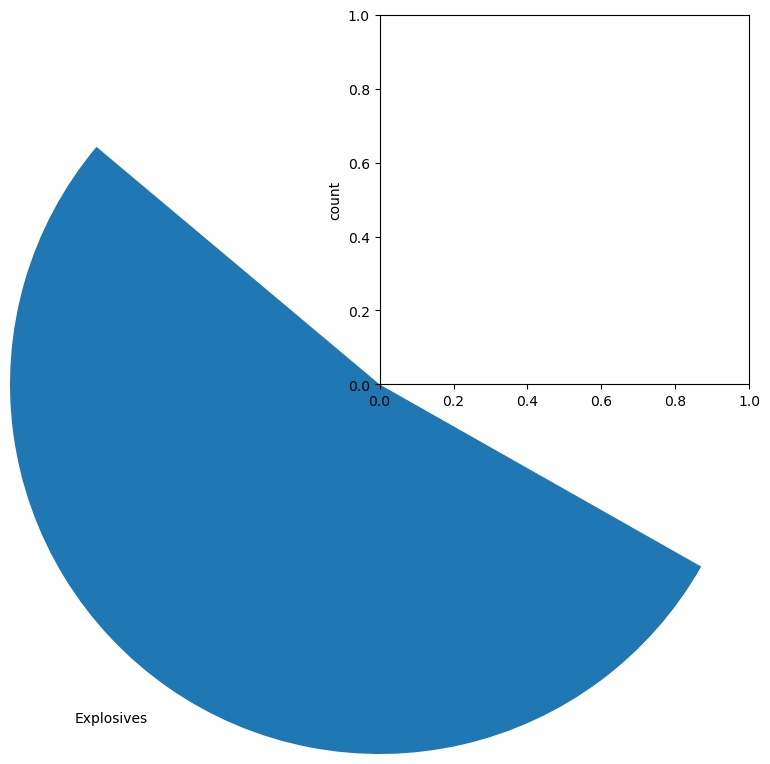